In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

## Path to Import

In [7]:
path_import = "male_players.csv"
path_eksport = "out.csv"

Import Data

In [8]:
data = pd.read_csv(path_import).drop('Unnamed: 0', axis=1)

## Summary

In [11]:
club_data = []
for i in list(data.Club.unique()):
    count_ = data['Name'].loc[data['Club'] == i].count()
    att = round(data['Overall'].loc[(data['Club'] == i) & (data['Position'].isin(['CF', 'SS', 'LW', 'RW', 'ST', 'FW']))].mean(), 2)
    mid = round(data['Overall'].loc[(data['Club'] == i ) & (data['Position'].str.contains('M', na=False))].mean(), 2)
    deff = round(data['Overall'].loc[(data['Club'] == i ) & (data['Position'].str.contains('B', na=False)) | (data['Position'] == 'SW')].mean(), 2)
    average = round(data['Overall'].loc[data['Club'] == i].mean(), 2)
    club_data.append([i, count_, att, mid, deff, average]) 

nation_data = []
for i in list(data.Nation.unique()):
    count_ = data['Name'].loc[data['Nation'] == i].count()
    nation_data.append([i, count_, average]) 

position_count = []
for i in list(data.Position.unique()):
    count_ = data['Name'].loc[data['Position'] == i].count()
    position_count.append([i, count_]) 

club_data = sorted(club_data, key=lambda x: x[4], reverse=True)

## Eksport
with open(path_eksport, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Club', 'Player', 'ATTK', 'MID', 'DEFF', 'Overall'])
    for row in club_data:
        writer.writerow(row)

## Visual Data

Nation

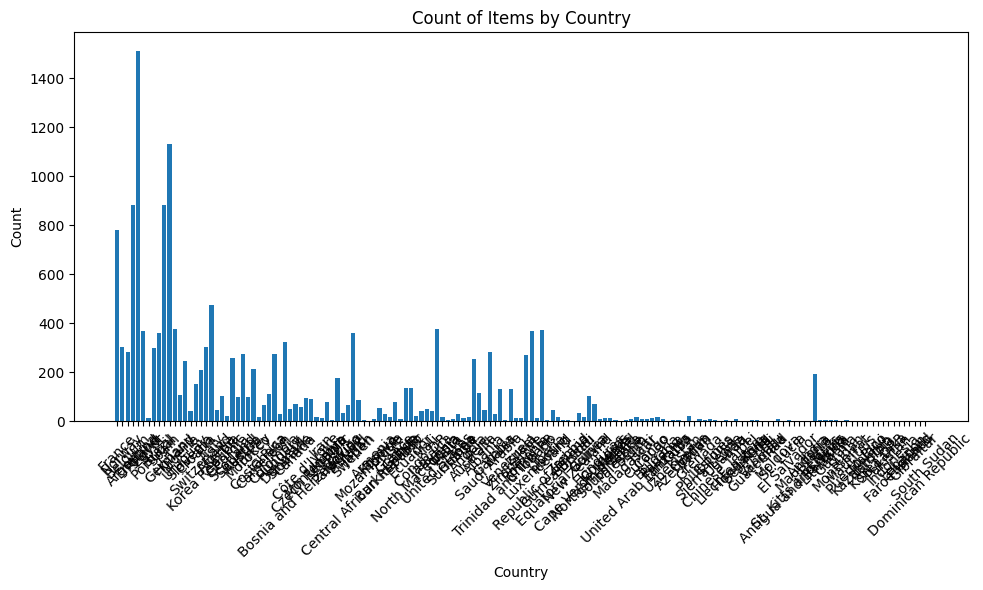

In [ ]:
nation = [item[0] for item in nation_data]
count_player = [item[1] for item in nation_data]

plt.figure(figsize=(10, 6))
plt.bar(nation, count_player)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Items by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Position

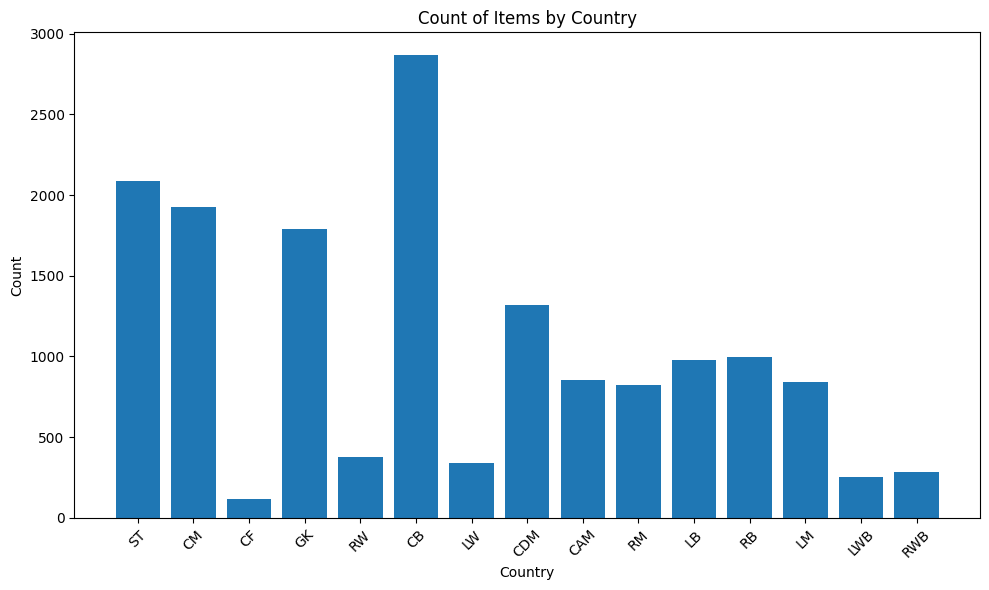

In [123]:
position = [item[0] for item in position_count]
count_player = [item[1] for item in position_count]

plt.figure(figsize=(10, 6))
plt.bar(position, count_player)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Items by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## Get Info Player

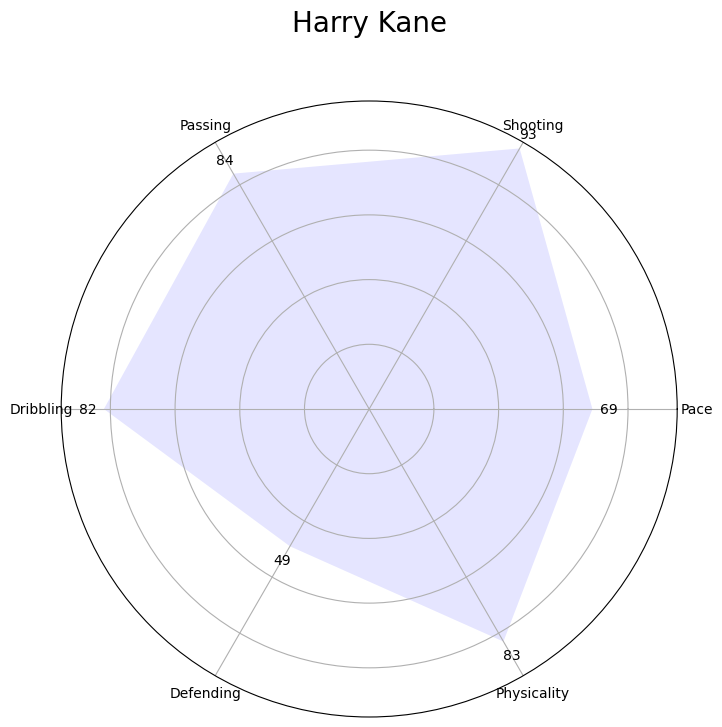

In [4]:
input_team = 'FC Bayern München'
input_player = 'Harry Kane'

club_info = data.loc[data['Club'] == input_team]
list_player = club_info[['Name', 'Position']].sort_values('Position', ascending=False)
get_player = club_info.loc[club_info['Name'] == input_player]

attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']
average_attributes = get_player[attributes].values[0]

num_attributes = len(attributes)

angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attributes, color='black', size=10)

average_attributes = np.append(average_attributes, average_attributes[:1])
ax.fill(angles, average_attributes, 'b', alpha=0.1)
ax.set_yticklabels([])  
plt.title(input_player, size=20, color='black', y=1.1)

for i in range(num_attributes):
    angle_rad = angles[i]
    ax.text(angle_rad, 
        average_attributes[i] + 5, str(average_attributes[i]), ha='center', va='center')

plt.show()


## Get Info Team

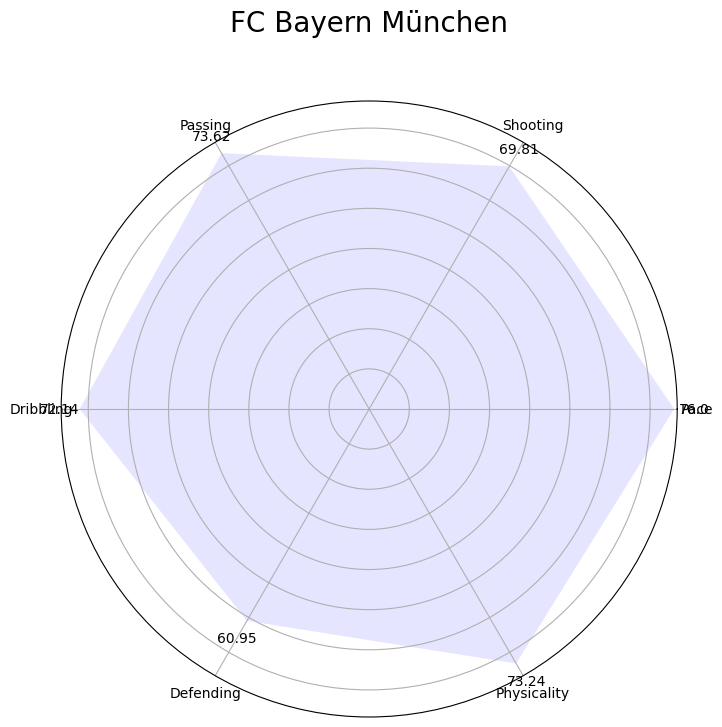

In [5]:
input_team = 'FC Bayern München'
club_info = data.loc[data['Club'] == input_team]
attributes = ['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']

average_attributes = club_info[['Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality']].mean()
for k in average_attributes.keys():
    average_attributes[k] = round(average_attributes[k],2)

num_attributes = len(attributes)

angles = np.linspace(0, 2 * np.pi, num_attributes, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attributes, color='black', size=10)

average_attributes = np.append(average_attributes, average_attributes[:1]) 
ax.fill(angles, average_attributes, 'b', alpha=0.1)
ax.set_yticklabels([])  
plt.title(input_team, size=20, color='black', y=1.1)

for i in range(num_attributes):
    angle_rad = angles[i]
    ax.text(angle_rad, 
        average_attributes[i] + 5, str(average_attributes[i]), ha='center', va='center')

plt.show()

## Top Player

In [12]:
list(data['Position'].unique())

['ST',
 'CM',
 'CF',
 'GK',
 'RW',
 'CB',
 'LW',
 'CDM',
 'CAM',
 'RM',
 'LB',
 'RB',
 'LM',
 'LWB',
 'RWB']

Index(['Name', 'Nation', 'Club', 'Position', 'Age', 'Overall', 'Pace',
       'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
       'Acceleration', 'Sprint', 'Positioning', 'Finishing', 'Shot', 'Long',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free', 'Curve',
       'Agility', 'Balance', 'Reactions', 'Ball', 'Composure', 'Interceptions',
       'Heading', 'Def', 'Standing', 'Sliding', 'Jumping', 'Stamina',
       'Strength', 'Aggression', 'Att work rate', 'Def work rate',
       'Preferred foot', 'Weak foot', 'Skill moves', 'URL', 'Gender', 'GK'],
      dtype='object')